In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-4, 5.0e-5, 1.0e-5]
for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    acc, f1 = trainer.run(lr=lr,wd=0.0,train_dataloader=data.train_dataloader,eval_dataloader=data.eval_dataloader,test_dataloader=data.test_dataloader, early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, learning rate 0.0001


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.9786	Val Loss:	0.7642	Accuracy:	0.7395	F1:	0.7418
2 / 20: Train Loss:	0.5217	Val Loss:	0.7808	Accuracy:	0.7395	F1:	0.7312
3 / 20: Train Loss:	0.3201	Val Loss:	0.7310	Accuracy:	0.7899	F1:	0.7869
4 / 20: Train Loss:	0.1411	Val Loss:	0.8409	Accuracy:	0.8067	F1:	0.8078
5 / 20: Train Loss:	0.1125	Val Loss:	0.9802	Accuracy:	0.7563	F1:	0.7518
6 / 20: Train Loss:	0.0888	Val Loss:	0.7770	Accuracy:	0.7815	F1:	0.7817
7 / 20: Train Loss:	0.0291	Val Loss:	0.8459	Accuracy:	0.8067	F1:	0.8070
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.76      0.84      0.80        38
oversimplification       0.93      0.72      0.81        36
slothful induction       0.78      0.84      0.81        45

          accuracy                           0.81       119
         macro avg       0.82      0.80      0.81       119
      weighted avg       0.82      0.81      0

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.0253	Val Loss:	0.8676	Accuracy:	0.6555	F1:	0.6329
2 / 20: Train Loss:	0.7402	Val Loss:	0.6248	Accuracy:	0.7899	F1:	0.7905
3 / 20: Train Loss:	0.3540	Val Loss:	0.5748	Accuracy:	0.8151	F1:	0.8135
4 / 20: Train Loss:	0.1253	Val Loss:	0.7674	Accuracy:	0.7731	F1:	0.7718
5 / 20: Train Loss:	0.0963	Val Loss:	0.6347	Accuracy:	0.8235	F1:	0.8221
6 / 20: Train Loss:	0.0974	Val Loss:	0.8858	Accuracy:	0.7479	F1:	0.7466
7 / 20: Train Loss:	0.0854	Val Loss:	0.7068	Accuracy:	0.7815	F1:	0.7846
8 / 20: Train Loss:	0.0273	Val Loss:	1.1179	Accuracy:	0.7227	F1:	0.7112
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.90      0.50      0.64        38
oversimplification       0.92      0.61      0.73        36
slothful induction       0.61      1.00      0.76        45

          accuracy                           0.72       119
         macro avg       0.81     

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.0750	Val Loss:	0.9997	Accuracy:	0.5882	F1:	0.5296
2 / 20: Train Loss:	0.9814	Val Loss:	0.9298	Accuracy:	0.6050	F1:	0.5740
3 / 20: Train Loss:	0.8845	Val Loss:	0.8355	Accuracy:	0.6975	F1:	0.6770
4 / 20: Train Loss:	0.7495	Val Loss:	0.7461	Accuracy:	0.7143	F1:	0.7013
5 / 20: Train Loss:	0.6183	Val Loss:	0.6614	Accuracy:	0.7563	F1:	0.7536
6 / 20: Train Loss:	0.4782	Val Loss:	0.6038	Accuracy:	0.7647	F1:	0.7623
7 / 20: Train Loss:	0.3648	Val Loss:	0.5707	Accuracy:	0.8067	F1:	0.8010
8 / 20: Train Loss:	0.2705	Val Loss:	0.5533	Accuracy:	0.7899	F1:	0.7876
9 / 20: Train Loss:	0.1948	Val Loss:	0.5964	Accuracy:	0.7983	F1:	0.7936
10 / 20: Train Loss:	0.1518	Val Loss:	0.6867	Accuracy:	0.7479	F1:	0.7440
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.88      0.55      0.68        38
oversimplification       0.93      0.69      0.79        36
slothful i

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

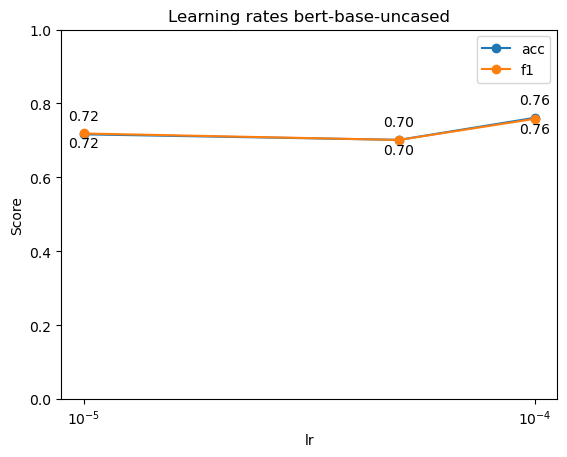

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')